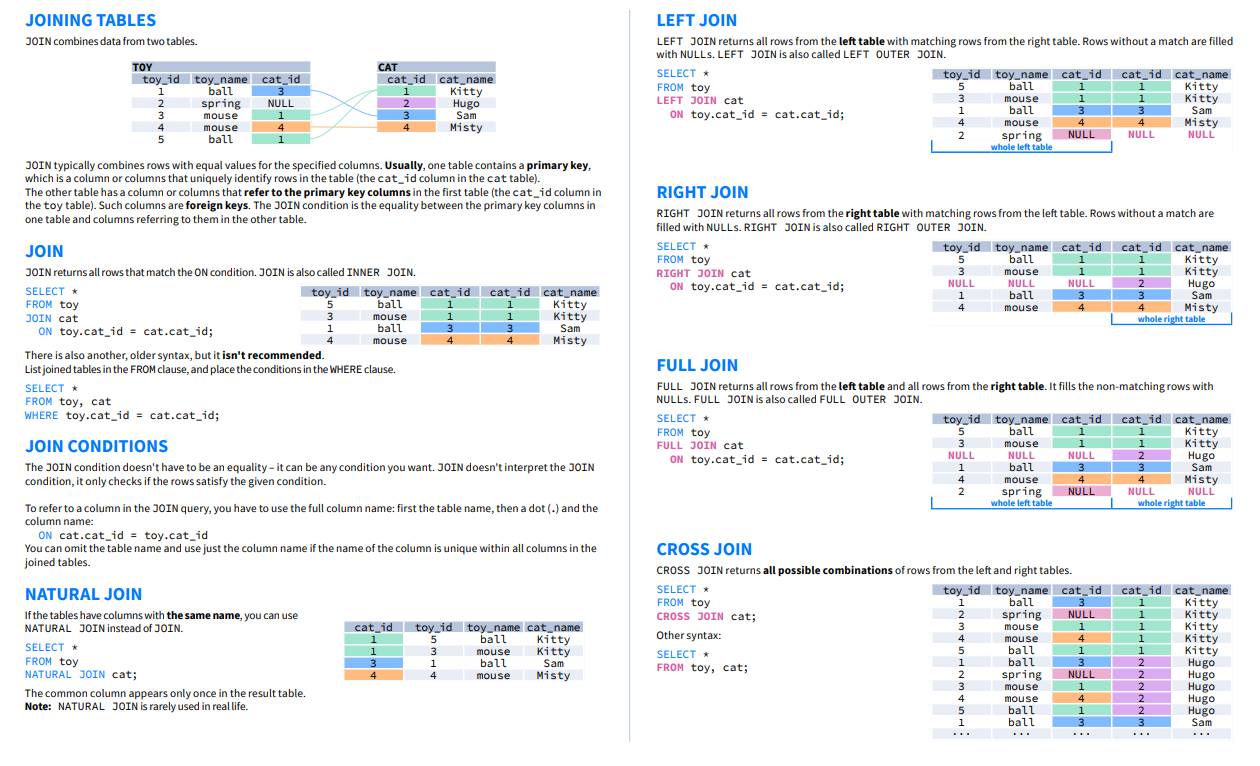
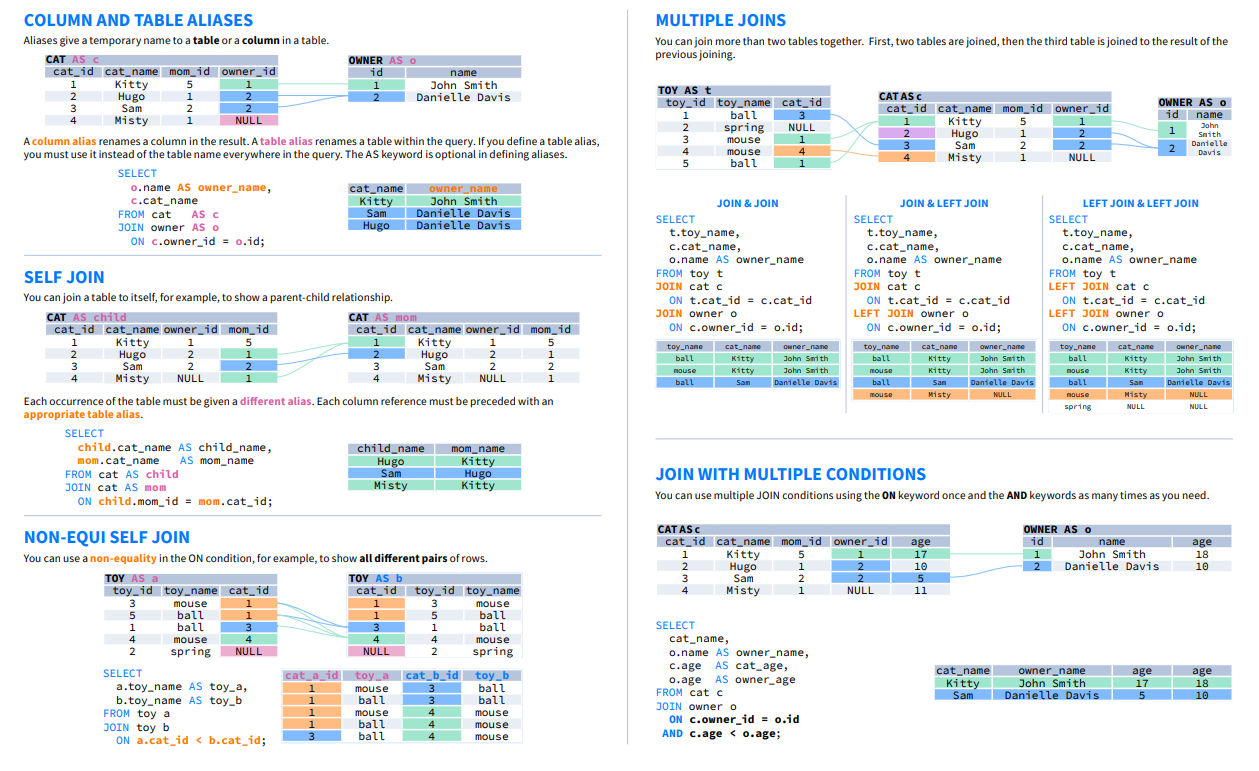

In [3]:
!pip3 install pymysql
!pip3 install ipython-sql
!pip3 install mysqlclient

In [4]:
import pymysql
import pandas as pd

In [5]:
db_name = 'hr'
db_host = 'localhost'
db_username = 'root'
db_password = 'kiranprm11mysql'

In [8]:
try:
    conn = pymysql.connect(host = db_host,
                            port = int(3306),
                            user = 'root',
                            passwd = db_password,
                            db = db_name)
except e:
    print(e)

In [9]:
if conn:
    print('connected')
else:
    print('error')

connected


# QUESTIONS 

- 1 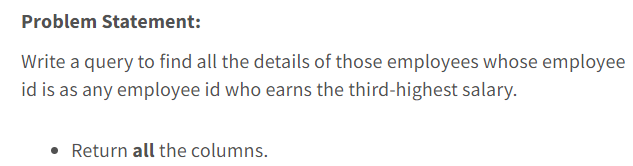

In [14]:
pd.read_sql_query('''


SELECT 
    *
FROM employees
ORDER BY salary DESC
LIMIT 3 OFFSET 3



''', conn)

,employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,commission_pct,manager_id,department_id
0,145,John,Russell,JRUSSEL,011.44.1344.429268,1996-10-01,SA_MAN,14000,0.4,100,80
1,146,Karen,Partners,KPARTNER,011.44.1344.467268,1997-01-05,SA_MAN,13500,0.3,100,80
2,201,Michael,Hartstein,MHARTSTE,515.123.5555,1996-02-17,MK_MAN,13000,None,100,20


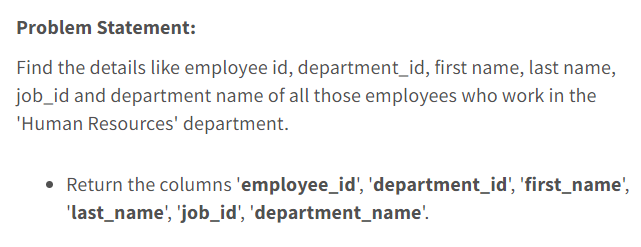

In [15]:
pd.read_sql_query('''


SELECT
    e.employee_id,
    e.department_id,
    e.first_name,
    e.last_name,
    e.job_id,
    d.department_name
FROM employees e
LEFT JOIN departments d
ON e.department_id = d.department_id
WHERE d.department_name = 'Human Resources'



''', conn)

,employee_id,department_id,first_name,last_name,job_id,department_name
0,203,40,Susan,Mavris,HR_REP,Human Resources


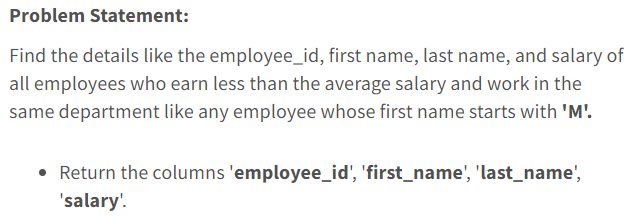

In [17]:
pd.read_sql_query('''


SELECT
    employee_id,
    first_name,
    last_name,
    salary
FROM employees
WHERE salary < 
    (
        SELECT 
            AVG(salary)
        FROM employees
    ) 
    AND department_id IN
    (
        SELECT 
            department_id 
        FROM employees
        WHERE first_name like 'M%'
    )



''', conn).head()

,employee_id,first_name,last_name,salary
0,124,Kevin,Mourgos,5800
1,125,Julia,Nayer,3200
2,126,Irene,Mikkilineni,2700
3,127,James,Landry,2400
4,128,Steven,Markle,2200


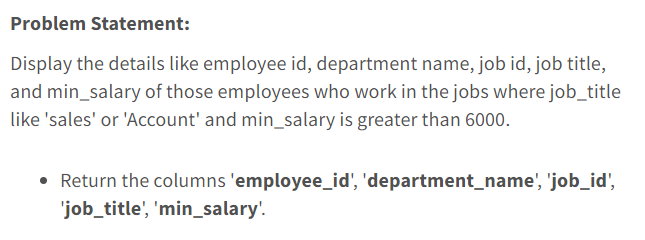

In [18]:
pd.read_sql_query('''


SELECT 
   e.employee_id,
   d.department_name,
   jh.job_id,
   j.job_title,
   j.min_salary
FROM employees e 
JOIN departments d 
ON e.department_id = d.department_id
LEFT JOIN job_history jh
ON d.department_id = jh.department_id
JOIN jobs j 
ON jh.job_id = j.job_id
WHERE (job_title LIKE 'sales%' OR job_title LIKE 'account%') AND min_salary >= 6000


''', conn).head()

,employee_id,department_name,job_id,job_title,min_salary
0,145,Sales,SA_REP,Sales Representative,6000.0
1,145,Sales,SA_MAN,Sales Manager,10000.0
2,146,Sales,SA_REP,Sales Representative,6000.0
3,146,Sales,SA_MAN,Sales Manager,10000.0
4,147,Sales,SA_REP,Sales Representative,6000.0


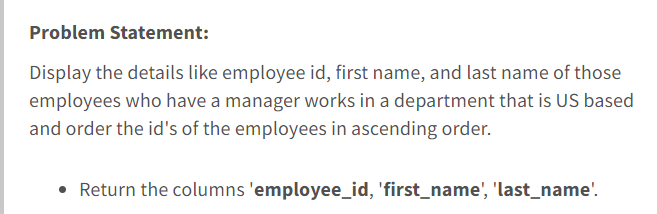

In [20]:
pd.read_sql_query('''


SELECT 
    e.employee_id,
    e.first_name,
    e.last_name
FROM employees e
JOIN employees e1
ON e.manager_id = e1.employee_id
JOIN departments d 
ON e1.department_id = d.department_id 
JOIN locations l 
ON d.location_id = l.location_id 
WHERE country_id like '%US'
ORDER BY employee_id  


''', conn).head(10)

,employee_id,first_name,last_name
0,101,Neena,Kochhar
1,102,Lex,De Haan
2,103,Alexander,Hunold
3,104,Bruce,Ernst
4,105,David,Austin
5,106,Valli,Pataballa
6,107,Diana,Lorentz
7,108,Nancy,Greenberg
8,109,Daniel,Faviet
9,110,John,Chen


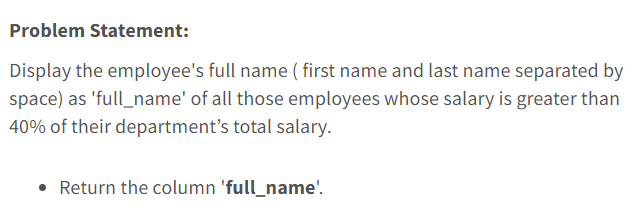

In [21]:
pd.read_sql_query('''


SELECT 
CONCAT(e1.first_name, " ",e1.last_name) AS full_name
FROM employees e1 
WHERE salary > 
    ( 
        SELECT 
            (SUM(salary))*.4 
        FROM employees e2 
        WHERE e1.department_id=e2.department_id
    )



''', conn).head(10)

,full_name
0,Steven King
1,Den Raphaely
2,Jennifer Whalen
3,Michael Hartstein
4,Susan Mavris
5,Hermann Baer
6,Shelley Higgins
7,William Gietz


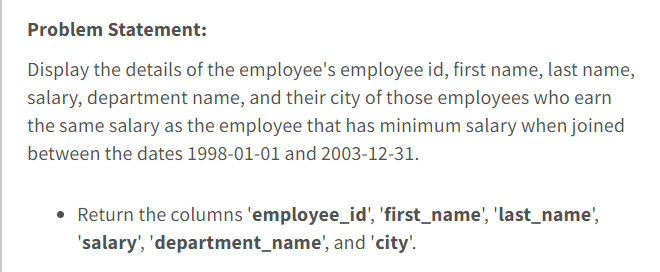

In [22]:
pd.read_sql_query('''


SELECT 
    e.employee_id,
    e.first_name,
    e.last_name,
    e.salary,
    d.department_name,
    l.city
FROM employees e 
LEFT JOIN departments d
ON e.department_id = d.department_id
LEFT JOIN locations l 
ON d.location_id = l.location_id
WHERE salary = 
    (
        SELECT 
            MIN(salary)
        FROM employees 
        WHERE hire_date BETWEEN '1998-01-01' AND '2003-12-31' 
    )


''', conn).head(10)

,employee_id,first_name,last_name,salary,department_name,city
0,132,TJ,Olson,2100,Shipping,South San Francisco


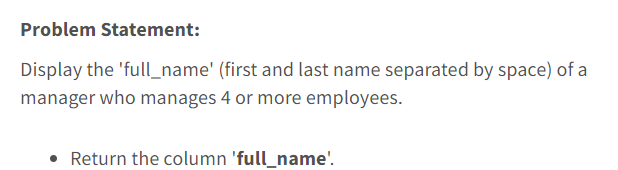

In [23]:
pd.read_sql_query('''

SELECT 
    CONCAT(first_name , " " , last_name) AS full_name
FROM employees
WHERE employee_id IN
    (
        SELECT manager_id
        FROM employees 
        GROUP BY manager_id
        HAVING COUNT(manager_id) >= 4
    )


''', conn).head(10)

,full_name
0,Steven King
1,Neena Kochhar
2,Alexander Hunold
3,Nancy Greenberg
4,Den Raphaely
5,Matthew Weiss
6,Adam Fripp
7,Payam Kaufling
8,Shanta Vollman
9,Kevin Mourgos


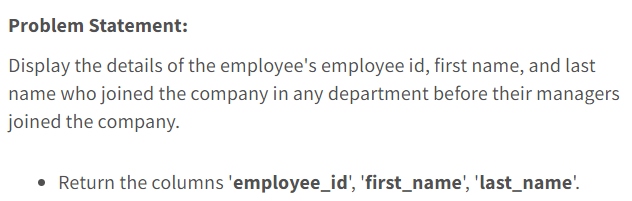

In [24]:
pd.read_sql_query('''

SELECT
    emp.employee_id,
    emp.first_name,
    emp.last_name
FROM employees emp
JOIN employees mgr
ON emp.manager_id = mgr.employee_id 
WHERE emp.hire_date < mgr.hire_date 

''', conn).head(10)

,employee_id,first_name,last_name
0,200,Jennifer,Whalen
1,103,Alexander,Hunold
2,109,Daniel,Faviet
3,131,James,Marlow
4,184,Nandita,Sarchand
5,185,Alexis,Bull
6,137,Renske,Ladwig
7,192,Sarah,Bell
8,193,Britney,Everett
9,141,Trenna,Rajs


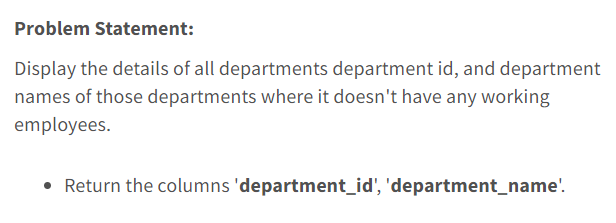

In [25]:
pd.read_sql_query('''

SELECT 
    d.department_id,
    d.department_name
FROM departments d
LEFT JOIN employees e
ON d.department_id = e.department_id
WHERE e.department_id IS NULL

''', conn).head(10)

,department_id,department_name
0,120,Treasury
1,130,Corporate Tax
2,140,Control And Credit
3,150,Shareholder Services
4,160,Benefits
5,170,Manufacturing
6,180,Construction
7,190,Contracting
8,200,Operations
9,210,IT Support


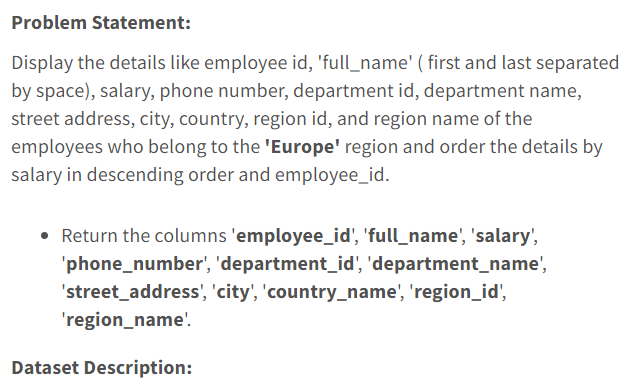

In [26]:
pd.read_sql_query('''

SELECT
    e.employee_id, 
    concat(e.first_name,' ',e.last_name) full_name, 
    e.salary, 
    e.phone_number, 
    e.department_id, 
    d.department_name, 
    l.street_address,
    l.city, 
    c.country_name, 
    r.region_id, 
    r.region_name

FROM employees e 
LEFT JOIN departments d 
ON e.department_id = d.department_id
LEFT JOIN locations l 
ON d.location_id = l.location_id
LEFT JOIN countries c 
ON l.country_id = c.country_id
LEFT JOIN regions r 
ON c.region_id = r.region_id
WHERE r.region_name = 'Europe'
ORDER BY e.salary DESC , e.employee_id


''', conn).head(10)

,employee_id,full_name,salary,phone_number,department_id,department_name,street_address,city,country_name,region_id,region_name
0,204,Hermann Baer,10000,515.123.8888,70,Public Relations,Schwanthalerstr. 7031,Munich,Germany,1,Europe
1,203,Susan Mavris,6500,515.123.7777,40,Human Resources,8204 Arthur St,London,United Kingdom,1,Europe


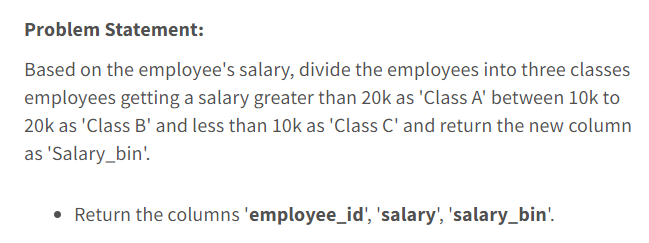

In [27]:
pd.read_sql_query('''

SELECT 
    employee_id,
    salary,
    CASE
        WHEN salary < 10000
        THEN 'Class C' 
        WHEN salary < 20000
        THEN 'Class B'
        ELSE 'Class A'
    END as Salary_bin
FROM employees



''', conn).head(10)

,employee_id,salary,Salary_bin
0,100,25000,Class A
1,101,17000,Class B
2,102,17000,Class B
3,103,9000,Class C
4,104,6000,Class C
5,105,4800,Class C
6,106,4800,Class C
7,107,4200,Class C
8,108,12000,Class B
9,109,9000,Class C
